## Week 3 ##

This week we are making use of the classic harmonic oscillator to implement a numerical differential equation solver, and will be comparing it to the analytical solutions.
We will also implement several plots, including a visualisation of the phase-space trajectory of some oscillators.

### Task 1: ###

For an oscillator with the following Hamiltonian (Equation 1), implement a script which solves such a system, making use of the matrix form of the differential equation system (Equation 4). 
</br>

 $$ H= \frac{p^{2}}{2m} +  \frac{1}{2}m\omega^{2}q^{2} \tag{Equation 1.}$$

 $$ \frac{dq}{dt} = \frac{\partial H}{\partial p} =\frac{p}{m}  \tag{Equation 2.}$$

 $$ \frac{dp}{dt} = - \frac{\partial H}{\partial q} = - m\omega^{2}q \tag{Equation 3.}$$


 $$ \begin{bmatrix}\frac{dq}{dt}\\\frac{dp}{dt}\end{bmatrix} =\begin{bmatrix} 0 & \frac{1}{m} \\ -m\omega^{2} & 0 \end{bmatrix}  \begin{bmatrix} q \\ p \end{bmatrix} \tag{Equation 4.}$$
</br>

To solve the Hamilton equations (Equation 2 and 3), follow the subtasks a) to d). They will guide you to find a numerical solution for the differential equation system (Equation 4).


- a) Define a function **ode_sys**, see hints below.
</br>

- b) Use **scipy.integrate.solve_ivp** to initialize the solver.
</br>

- c) Execute the solver for a time np.array **t_space**.
</br>

- d) Extract the solutions as **q_num_sol** and **p_num_sol** (for the position and momentum vectors respectively).
</br>

</br>

> Hints for the **ode_sys** function. This function will be fed into the ODE solver. It should: 
> 1. Define the initial q and p conditions (vector column on the right of the matrix equation) from the QP input.
> 2. Define dq_dt and dp_dt as shown in the matrix form of the equation, by using these q and p values. (Expand the right side of the matrix equation)
> 3. Return dq_dt and dp_dt.
> 4. The time (t) input isn't explicitly used inside the function, but it is important as it is used in the solve_ivp method.

> Hint: Parametrize all your equations as functions of $q_{max}$, $m$, and $\omega$ (or $k$).

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.ticker import MultipleLocator

In [96]:
mass = 1
omega = 1
k = mass * omega ** 2
phi = 0
q_max = 1
p_max = (omega * mass) * q_max

## Numerical ODE Solver for Harmonic Oscillator ###
def ode_sys(t, QP):
    q_init, p_init = QP[0], QP[1]
    dq_dt = p_init / mass
    dp_dt = - k * q_init
    return [dq_dt, dp_dt]


QP = [5, 10]
t_space = np.arange(0, 10, .1)
sol = solve_ivp(ode_sys, [0, 10], y0=QP)
q_num_sol = sol.y[0]
p_num_sol = sol.y[1]
print(sol)
#  print(q_num_sol, p_num_sol)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  9.274e-02 ...  9.738e+00  1.000e+01]
        y: [[ 5.000e+00  5.905e+00 ... -7.863e+00 -9.651e+00]
            [ 1.000e+01  9.494e+00 ... -7.946e+00 -5.642e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 74
     njev: 0
      nlu: 0


### Task 2: ###

Implement the analytical solutions of the harmonic oscillator below as lambda functions (of a time array) called **an_sol_q** and **an_sol_p**.
</br>
</br>

$$ q= q_{max}\sin(\omega t+ \phi)  \tag{Equation 5.}$$
$$ p= p_{max}\cos(\omega t+ \phi)  \tag{Equation 6.}$$

$$p_{max}=(\omega m) q_{max} \tag{Equation 7.}$$

> Hint: Parametrize all your equations as functions of $q_{max}$, $m$, and $\omega$ (or $k$).
</br>

> Hint: Make sure the initial conditions of the oscillator are identical to the ones used in Task 1.

In [92]:
### Analytical Oscillator Equations ###
an_sol_q = lambda t:  q_max * np.sin(omega * t + phi)
an_sol_p = lambda t:  omega * mass * q_max * np.cos(omega * t + phi)

# Grading Block Task 1 & 2 #

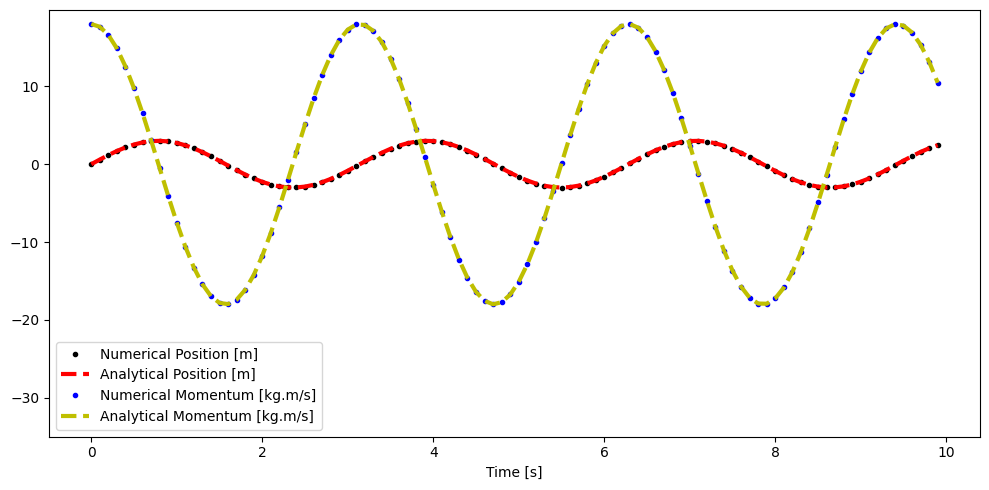

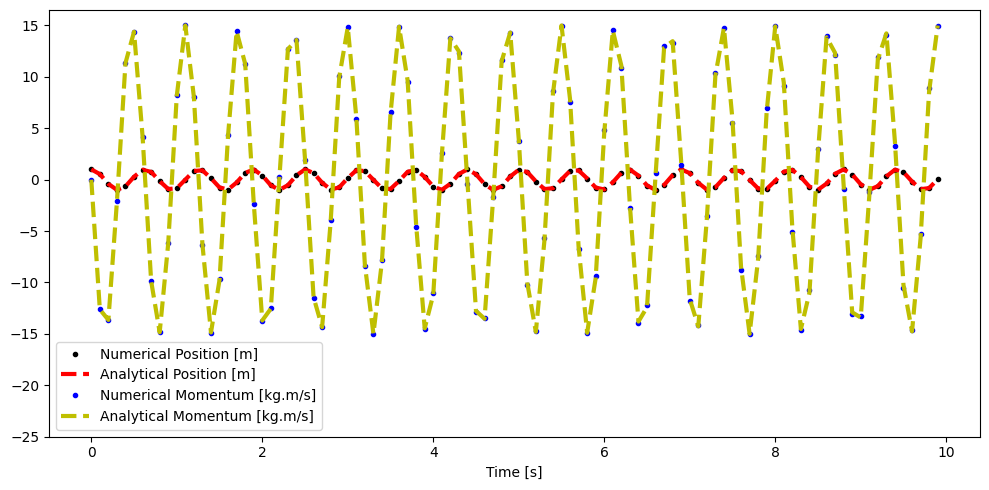

In [93]:
mass = 3
omega = 2
k = mass * omega ** 2
phi = 0
q_max = 3
p_max = (omega * mass) * q_max
q_init = 0
p_init = p_max

q_an_sol = an_sol_q(t_space)
p_an_sol = an_sol_p(t_space)
num_sol = solve_ivp(ode_sys, [0, 25], [q_init, p_init], dense_output=True)
QP_num_sol = num_sol.sol(t_space)
q_num_sol = QP_num_sol[0].T
p_num_sol = QP_num_sol[1].T

fig1 = plt.figure(figsize=(10,5))

plt.plot(t_space, q_num_sol, 'k.',linewidth=1, label='Numerical Position [m]')
plt.plot(t_space, q_an_sol,'r--', linewidth=3, label='Analytical Position [m]')
plt.plot(t_space, p_num_sol,'b.', linewidth=1, label='Numerical Momentum [kg.m/s]')
plt.plot(t_space, p_an_sol, 'y--', linewidth=3, label='Analytical Momentum [kg.m/s]')

plt.xlabel('Time [s]')

plt.ylim(-35)
plt.legend(loc='lower left')
fig1.tight_layout()


#  Second plot
mass = 1.5
omega = 10
k = mass * omega ** 2
phi = np.pi/2
q_max = 1
p_max = (omega * mass) * q_max
q_init = q_max
p_init = 0

q_an_sol = an_sol_q(t_space)
p_an_sol = an_sol_p(t_space)
num_sol = solve_ivp(ode_sys, [0, 25], [q_init, p_init], dense_output=True)
QP_num_sol = num_sol.sol(t_space)
q_num_sol = QP_num_sol[0].T
p_num_sol = QP_num_sol[1].T

fig1 = plt.figure(figsize=(10,5))

plt.plot(t_space, q_num_sol, 'k.',linewidth=1, label='Numerical Position [m]')
plt.plot(t_space, q_an_sol,'r--', linewidth=3, label='Analytical Position [m]')
plt.plot(t_space, p_num_sol,'b.', linewidth=1, label='Numerical Momentum [kg.m/s]')
plt.plot(t_space, p_an_sol, 'y--', linewidth=3, label='Analytical Momentum [kg.m/s]')

plt.xlabel('Time [s]')

plt.ylim(-25)
plt.legend(loc='lower left')
fig1.tight_layout()

### Task 3: ###
1. Implement the analytical solutions of the **damped** harmonic oscillator below as lambda functions (of a time array) called **damped_an_sol_q** and **damped_an_sol_p**.
</br>
</br>

$$ q= e^{-\gamma t}  q_{max}\sin(\omega t+ \phi)  \tag{Equation 8.}$$
$$ p= e^{-\gamma t}  p_{max}\cos(\omega t+ \phi)  \tag{Equation 9.}$$




> Hint: Parametrize all your equations as functions of $q_{max}$, $m$, and $\omega$ (or $k$)



2. Generate a plot which updates every arbitrary $dt$, showing the trajectory of an undamped oscillator, and of damped oscillator simultaneously.

In [94]:
### Analytical Damped Oscillator Equations ###
an_sol_q_damp = lambda gamma, t:  np.exp(- gamma * t) * q_max * np.sin(omega * t + phi)
an_sol_p_damp = lambda gamma, t:  np.exp(- gamma * t) * omega * mass * q_max * np.cos(omega * t + phi)

Text(0.5, 0.01, 'Time [s]')

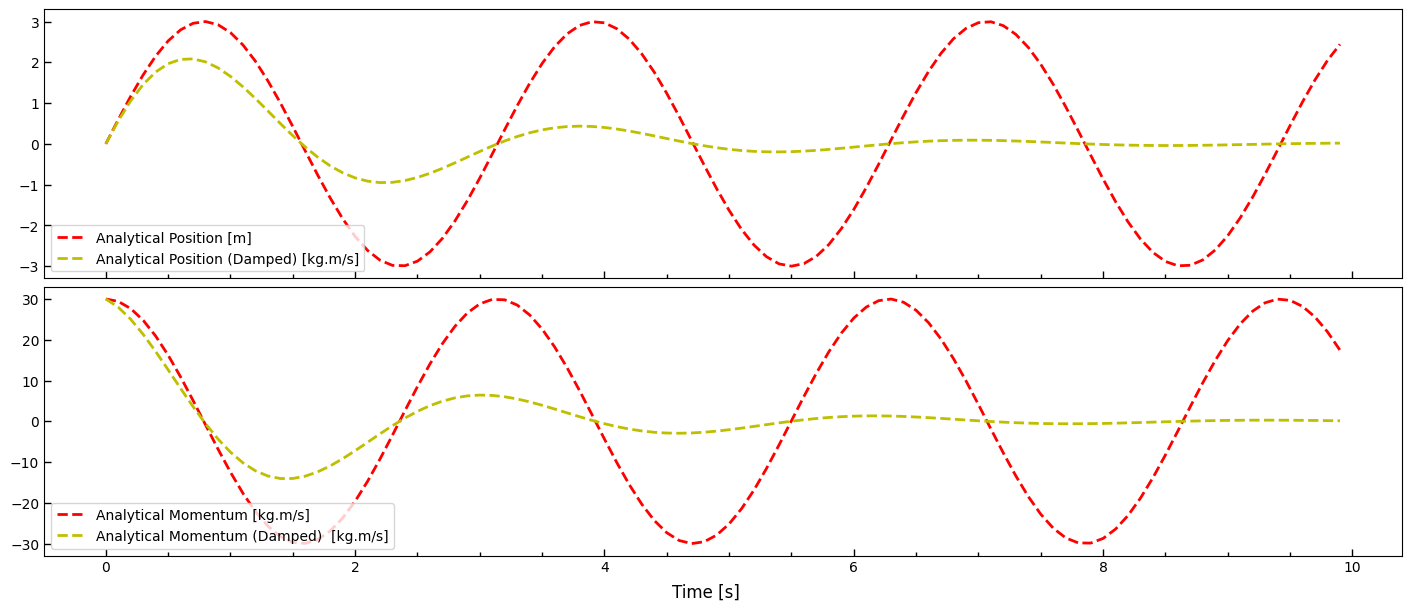

In [95]:
mass = 5
omega = 2
gamma = .5
phi = 0
q_max = 3
q_init = 0
p_init = p_max

q_an_sol = an_sol_q(t_space)
q_damp_an_sol = an_sol_q_damp(gamma, t_space)

p_an_sol = an_sol_p(t_space)
p_an_sol_damp = an_sol_p_damp(gamma, t_space)

QP_num_sol = num_sol.sol(t_space)
q_num_sol = QP_num_sol[0].T
p_num_sol = QP_num_sol[1].T

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, constrained_layout=True, figsize=(14,6), sharex=True)

ax1.plot(t_space, q_an_sol,'r--', lw=2, label='Analytical Position [m]')
ax1.plot(t_space, q_damp_an_sol, 'y--', lw=2, label='Analytical Position (Damped) [kg.m/s]')
ax1.legend(loc='lower left')

ax1.xaxis.set_major_locator(MultipleLocator(2))
ax1.xaxis.set_minor_locator(MultipleLocator(.5))
ax1.yaxis.set_major_locator(MultipleLocator(1))
ax1.tick_params(direction='in', which='both', width=1)
ax1.tick_params(which='major', length=5)
ax1.tick_params(which='minor', length=3)

ax2.plot(t_space, p_an_sol, 'r--',lw=2, label='Analytical Momentum [kg.m/s]')
ax2.plot(t_space, p_an_sol_damp,'y--', lw=2, label='Analytical Momentum (Damped)  [kg.m/s]')
ax2.legend(loc='lower left')

ax2.xaxis.set_major_locator(MultipleLocator(2))
ax2.xaxis.set_minor_locator(MultipleLocator(.5))
ax2.yaxis.set_major_locator(MultipleLocator(10))
ax2.tick_params(direction='in', which='both', width=1)
ax2.tick_params(which='major', length=5)
ax2.tick_params(which='minor', length=3)

fig.supxlabel("Time [s]")